## Homework 02: due 22:00, Sunday, November 7, 2021

### -	Please work on this Jupyter notebook directly.
### -	Name a folder using your student id and Assignment number (e.g., b88501045-HW2), put all the python scripts and notebook files into the folder and zip the folder (e.g., b88501045-HW2.zip).
### - Submit the homework directly through the NTU COOL course website.


### 0. import essential modules

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

### 1. (35%) Work with data file _Rain_MD-Androy-Bekily_1d_19810101-20210530_CHIRPS.csv_ and perform the following analysis.

##### 1.1 (5%) Import CSV data file _Rain_MD-Androy-Bekily_1d_19810101-20210530_CHIRPS.csv_ and make column 'datetime' datetime format and make it index* of the dataframe 

* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html

In [2]:
fn_data = "/Users/lintingxuan/Desktop/數據分析/HW2/Rain_MD-Androy-Bekily_1d_19810101-20210530_CHIRPS.csv"

# read csv file, a dataframe will be created to store data
df_rain_1d = pd.read_csv(fn_data)
df_rain_1d['date'] = pd.to_datetime(df_rain_1d['date'], format='%Y/%m/%d')
df_rain_1d=df_rain_1d.set_index("date")
df_rain_1d

,1_9943,1_9944,1_10131,1_10132,1_10133,1_10134,1_10317,1_10318,1_10319,1_10320,...,1_20919,1_20920,1_20921,1_20922,1_20923,1_20924,1_20925,1_20926,1_20927,1_21106
date,,,,,,,,,,,,,,,,,,,,,
1981-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
1981-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.48,2.39,2.33,2.28,2.3,2.32,2.33,2.35,2.37,2.96
1981-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
1981-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
1981-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
2021-05-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
2021-05-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00


##### 1.2. (5%) Extract non-zero 1-day rainfall data.

In [3]:
df_rain_1d=df_rain_1d.replace(0,np.NaN)

#### 1.3. (5% + 10% + 10%) Calculate the quantile values, $q_p (X)$, of 1-day non-zero rainfall data for each location and for each calendar month for $p=0.75$ and $0.95$, and identify the maximum $0.75$ and $0.95$ quantiles, respectively, from all locations and the associated location IDs for each calendar month. Please export the result to a _CSV_ file named "Rain_MD-Androy-Bekily_1d-NonZero-Max-Quantiles_19810101-20210530.csv"

#### The output CSV file format shall look like the following:

Month,max_q-0.75, id_q-0.75, max_q-0.95, id_q-0.95

January,xx.xx, idddd, yy.yy, iiiidd

Feburary,ss.ss, iiddd, hh.hh, iidddd

..., ..., ..., ..., ...


In [4]:
# You may need this module for this task
import calendar

In [5]:
df_rain_1d
col=list(df_rain_1d.columns)
df_rain_1d["m"]=pd.DatetimeIndex(df_rain_1d.index).month

# create month index
mon = list(map(int, np.linspace(1,12,12)))
month=[]
for i in mon:
    month.append(calendar.month_name[i])

df_rain_m=pd.DataFrame(columns=['max_q-0.75','id_q-0.75','max_q-0.95','id_q-0.95'])

for i in range(1,13):
    df_rain=df_rain_1d[df_rain_1d['m'] == i]
    #df_rain.replace(0,np.NaN)
    a,b=[],[]
    for j in col[:-1]:
        a.append(np.nanquantile(df_rain[j], .75))
        b.append(np.nanquantile(df_rain[j], .95))
    
    row=["%.2f"%(max(a)),list(df_rain.columns)[a.index(max(a))],"%.2f"%(max(b)),list(df_rain.columns)[b.index(max(b))]]
    row_df = pd.Series(row,index = df_rain_m.columns)
    df_rain_m=df_rain_m.append(row_df,ignore_index=True)
    
df_rain_m[""]=month
df_rain_m=df_rain_m.set_index("")
df_rain_1d=df_rain_1d.drop(columns=["m"])


In [6]:
df_rain_m

,max_q-0.75,id_q-0.75,max_q-0.95,id_q-0.95
,,,,
January,23.01,1_16783,46.39,1_15454
February,21.78,1_15050,44.97,1_13366
March,17.44,1_16783,39.68,1_17915
April,9.27,1_15628,22.09,1_16762
May,7.48,1_13543,20.71,1_13557
June,8.30,1_9944,14.90,1_9943
July,5.99,1_13542,8.78,1_14112
August,6.91,1_19789,9.72,1_19413
September,6.72,1_15075,15.70,1_14112


In [7]:
fn_data_out = "./Rain_MD-Androy-Bekily_1d-NonZero-Max-Quantiles_19810101-20210530.csv"
df_rain_m.to_csv(fn_data_out)

### 2. (30%) Work with _Rain_MD-Androy-Bekily_1M_19810101-20210530_CHIRPS.csv_, and complete the following tasks.

#### 2.1 (5%) Import CSV data file _Rain_MD-Androy-Bekily_1M_19810101-20210530_CHIRPS.csv_ and make column 'datetime' datetime format.

In [8]:
fn_data = "/Users/lintingxuan/Desktop/數據分析/HW2/Rain_MD-Androy-Bekily_1M_19810101-20210530_CHIRPS.csv"

# read csv file, a dataframe will be created to store data
df_rain_1d = pd.read_csv(fn_data)
df_rain_1d['date'] = pd.to_datetime(df_rain_1d['date'], format='%Y/%m/%d')
df_rain_1d

,date,1_9943,1_9944,1_10131,1_10132,1_10133,1_10134,1_10317,1_10318,1_10319,...,1_20919,1_20920,1_20921,1_20922,1_20923,1_20924,1_20925,1_20926,1_20927,1_21106
0,1981-01-01,107.64,107.00,109.60,109.00,108.36,107.74,112.52,112.02,111.53,...,155.94,156.53,157.26,158.03,158.80,159.55,160.33,161.14,161.92,154.26
1,1981-02-01,203.17,205.40,201.18,203.25,205.48,207.73,196.47,197.84,199.52,...,265.24,265.05,265.20,265.53,265.99,266.63,267.45,268.46,269.50,265.00
2,1981-03-01,76.41,76.92,76.04,76.52,77.02,77.57,75.21,75.48,75.78,...,101.60,101.05,100.57,100.19,99.86,99.51,99.15,98.89,98.71,103.31
3,1981-04-01,11.58,11.72,11.41,11.54,11.67,11.81,11.11,11.18,11.28,...,12.89,13.06,13.23,13.41,13.54,13.66,13.74,13.79,13.84,12.45
4,1981-05-01,33.44,33.49,33.04,33.11,33.19,33.25,32.28,32.42,32.57,...,19.68,19.78,19.90,20.02,20.14,20.26,20.37,20.47,20.57,19.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,2021-01-01,98.46,96.65,102.52,100.88,99.12,97.35,109.43,107.99,106.48,...,189.85,190.72,191.70,192.71,193.72,194.74,195.70,196.77,197.85,187.46
481,2021-02-01,126.22,125.78,127.74,127.12,126.57,126.15,131.16,130.32,129.47,...,167.43,166.42,165.54,164.75,163.97,163.31,162.86,162.60,162.45,168.27
482,2021-03-01,104.89,104.92,106.33,106.32,106.41,106.58,107.65,107.62,107.63,...,135.73,135.00,134.18,133.42,132.71,131.97,131.11,130.35,129.78,139.15
483,2021-04-01,22.26,22.44,21.94,22.10,22.29,22.46,21.30,21.50,21.68,...,20.55,20.90,21.19,21.45,21.64,21.79,21.85,21.87,21.87,19.43


#### 2.2 (10% + 10%) Assuming that Gamma distribution is a suitable distribution for the monthly rainfall, please fit the December rainfall for location '1_15823' with MLE and MoM methods and output the fitted parameters (using _print_), respectively.

In [9]:
df_rain_1d_Dec=df_rain_1d[df_rain_1d['date'].dt.month == 12]
df_rain_1d_Dec_loc=list(df_rain_1d_Dec['1_15823'])


In [10]:
# MLE
from scipy.stats import gamma
# shape(alpha), location, scale(beta)
result = gamma.fit(df_rain_1d_Dec_loc, floc = 0.0)
print("alpha =",result[0])
print("beta =",result[2])

alpha = 6.388784687259429
beta = 38.8148156713628


In [11]:
# MoM
mean=np.mean(df_rain_1d_Dec_loc)
variance=np.var(df_rain_1d_Dec_loc, ddof=1)
alpha=mean**2/variance
beta=variance/mean
print("alpha =",alpha)
print("beta =",beta)

alpha = 5.682145647703627
beta = 43.641876744257345


#### 2.3 (5%) Perform visual inspection on the above fitting result by plotting the histogram (with default number of bins) from the rainfall data and the pdf of fitted Gamma distribution in a single plot. 

In [12]:
df_rain_1d_Dec_loc.sort()
df_rain_1d_Dec_loc

[73.99,
 123.39,
 129.45,
 145.14,
 145.74,
 147.94,
 155.2,
 163.25,
 166.99,
 176.18,
 178.86,
 182.19,
 191.81,
 194.06,
 195.89,
 196.67,
 201.75,
 204.96,
 212.23,
 232.46,
 233.13,
 239.66,
 246.68,
 250.74,
 255.71,
 264.54,
 273.08,
 278.53,
 288.99,
 291.36,
 302.86,
 310.95,
 316.97,
 325.45,
 348.08,
 362.04,
 381.57,
 447.53,
 518.47,
 564.69]

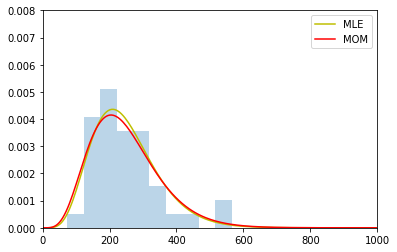

In [13]:
x = np.linspace (0, 1000, 200) 
y1 = stats.gamma.pdf(x, a=result[0], scale=result[2])
y2 = stats.gamma.pdf(x, a=alpha, scale=beta)

line1,=plt.plot(x, y1, "y-", label='MLE') 
line2,=plt.plot(x, y2, "r-", label='MOM') 
plt.legend(handles = [line1, line2], loc='upper right')

plt.ylim([0,0.008])
plt.xlim([0,1000])
plt.hist(df_rain_1d_Dec_loc,density=True, histtype='stepfilled', alpha=0.3)
plt.show()

### 3. (35%) The generalised Pareto distribution (GPD) is a 3-parameter continuous distribution. It is famous for it 'fat' tail and is largely used fot extreme risk modelling. 

#### The probability density function (PDF) of GPD is termed:

$f(x) = \frac{1}{\sigma}(1+\kappa z)^{-1(\frac{1}{\kappa}+1)}$

#### And the cumulative density function (CDF) is termed:

$F(x) = 1-(1+\kappa z)^{-\frac{1}{\kappa}}$

#### where $z = \frac{x-\mu}{\sigma}$, and $\mu$, $\sigma$ and $\kappa$ are _location_, _scale_ and _shape_ parameters, respectively.


PPF

$F(x) = 1-(1+\kappa z)^{-\frac{1}{\kappa}}$

$z = \frac{x-\mu}{\sigma}$

$x=\frac{[-1-(F(x)-1)^{-\kappa}]\sigma}{\kappa}+\mu$

#### 3.1 (10% + 5%) __Without using Scipy or other similar stats libraries__, please implement two functions named _gpd_rvs_ and _gpd_pdf_. The _gpd_rvs_ function can be used to sample a GPD-distributed random variate, whilst the _gpd_pdf_ function is used to model the pdf of the GPD.

In [14]:
# You may need these modules for this task
import random as rnd
import math

In [15]:
# Function to to sample GPD-distributed random variates
def gpd_rvs(mu, sigma, k):
    """Return a GPD-distributed random variate"""
    p = rnd.uniform(0, 1)
    r_gpd = (-1+(1-p)**(-k))*sigma/k+mu
    
    return r_gpd, p


In [16]:
# Function to model GPD pdf
def gpd_pdf(x, mu, sigma, k):
    """Return a GPD density function value random variate"""
    y_L=(((x-mu)/sigma*k+1)**(-1/k-1))/sigma

    return y_L

#### 3.2. (5%) Sample 250 GPD-distributed random variates using the _gpd_rvs_ function with the input parameters μ=2, σ=0.5 and k=1.2.

In [17]:
a=[]
for i in range(250):
    rvs, cdf = gpd_rvs(2,0.5,1.2)
    a.append(rvs)

print(a)

[2.1271280124878085, 51.66321283836702, 2.240463205263348, 16.658108535089323, 20.301387543975046, 27.336128837633584, 4.828002503994804, 2.0840204488283134, 2.2346989142201155, 4.4417130985724445, 2.2085090132062324, 22.030680753779105, 4.278040216620255, 2.0115670844261757, 4.676134784579965, 19.01399451340096, 12.671215440531016, 32.64533149344774, 2.0700019497033484, 2.2851393441706227, 2.1287415955037448, 22.327829366993967, 2.5962716335096943, 39.356663300152846, 2.0987042492719112, 2.3332249560730283, 2.492101039267785, 2.4598090170214366, 2.4439343969254197, 5.70244829594362, 3.848700875351644, 3.9170936294859677, 2.2366055477088462, 2.403678497201372, 2.429171830496, 2.202928783642425, 2.253048833181744, 2.3315137733809856, 2.977309131499382, 2.386075083168213, 11.96446609747253, 2.5287590710717103, 5.175630538786777, 2.628831350673225, 2.311682565192894, 2.102210314537064, 2.1435693833450506, 2.2188379786888293, 11.60924592536915, 9.733445409186936, 2.403713877604953, 2.21439

#### 3.3 (5% + 5%) Create a histogram plot for these sampled values using a fixed bin width $\nu$, which can be derived with the equation below.

$\nu=3.49sN^{-1/3}$

#### where $N$ is the number of data and $s$ is the sample standard deviation computed from data.

In [18]:
# Compute the bin width and number of bins
s=np.std(a, ddof=1)
N=len(a)
v=3.49*s*(N**(-1/3))
v

6.65576869571329

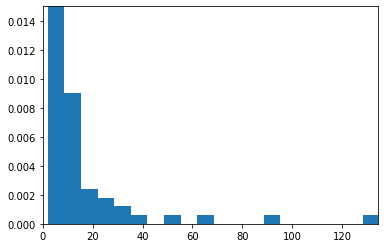

In [23]:
# Plot histogram
plt.hist(a,density=True,stacked=True, bins=np.arange(min(a), max(a) + v, v))
plt.ylim([0,0.015])
plt.xlim([0,max(a)])
plt.show()

#### 3.4. (5%) Perform visual inspection by creating a line plot using the _gpd_pdf_ function with parameters μ=2, σ=0.5 and k=1.2, and add this line plot to the above histogram plot.    

In [20]:
x = range(int(np.ceil(min(a))),int(np.ceil(max(a))))
y=[]
for i in x:
    y.append(gpd_pdf(i, 2,0.5,1.2))

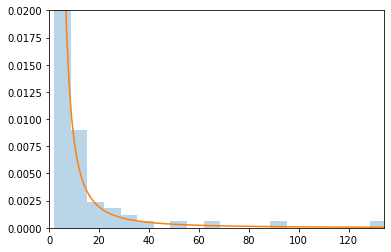

In [24]:
plt.hist(a,density=True, bins=np.arange(min(a), max(a) + v, v),alpha=0.3)
plt.plot(x,y)
plt.ylim([0,0.02])
plt.xlim([0,max(a)])
plt.show()